In [19]:
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import numpy as np

In [3]:
plt.rcParams["figure.figsize"]=(6,4)
plt.rcParams["font.size"]=10
plt.rcParams["axes.unicode_minus"]=False
plt.rcParams["font.family"]="BM YEONSUNG"

# 문제 2

In [4]:
Data=pd.read_excel('https://data.hossam.kr/E04/aircon.xlsx')
data=pd.DataFrame(Data)

## 데이터확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   예약대수    10 non-null     int64
 1   판매대수    10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
예약대수,10.0,35.7,12.508220,19.0,26.75,34.0,44.25,58.0
판매대수,10.0,61.3,20.806249,33.0,49.25,57.5,69.75,98.0


## EDA

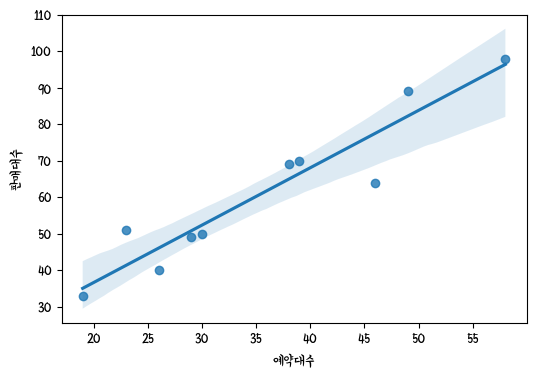

In [7]:
plt.figure()
sns.regplot(data=data, x="예약대수",y="판매대수")
plt.show()

## Regression

In [8]:
model=smf.ols('판매대수~예약대수',data=data)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   판매대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        14:36:49   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.4

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
md=model.fit()

### 도출된 Regression
> 매출대수=0.189*예약대수+5.0689

+ 예약대수를 통한 매출대수의 설명력을 약 89% 가진 Regression이다.
+ F-statistic(F(1,8)=69.40, p<0.05)로 통계적으로 유의미한 모델이다.

### 예측하기

In [10]:
md.bse[0]+150*md.bse[1]

35.47318286998882

# 문제 3

In [11]:
Data=pd.read_excel("https://data.hossam.kr/E04/galton.xlsx")
data=pd.DataFrame(Data)

In [12]:
data2=pd.DataFrame(data.groupby('parent').mean())

In [13]:
data2.reset_index(inplace=True)

In [14]:
idx=data.parent.unique()
idx

array([70.5, 68.5, 65.5, 64.5, 64. , 67.5, 66.5, 69.5, 71.5, 72.5, 73. ])

In [20]:
sp.stats.shapio(data[data["parent"]==idx[0]])

AttributeError: module 'scipy.stats' has no attribute 'shapio'

<Axes: xlabel='parent', ylabel='child'>

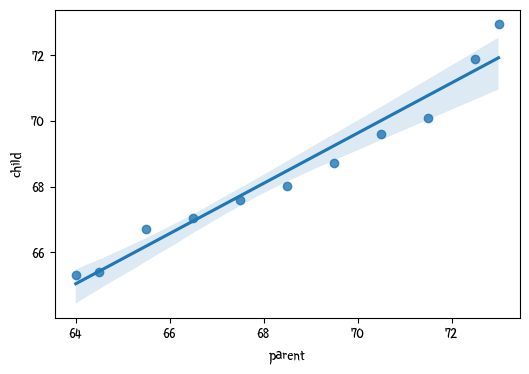

In [15]:
plt.figure()
sns.regplot(data=data2, x="parent",y='child')

In [16]:
model=smf.ols('parent~child',data=data2)
md=model.fit()

### 내새끼 키...

In [17]:
md.params[1]*75+md.params[0]

76.66755227047081